<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/EX15_Data_Augmentation_to_Address_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_potos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_potos'

In [4]:
import pathlib

In [5]:
pathlib.Path(data_dir)

PosixPath('datasets/flower_potos')

In [14]:
data_dir_2 = pathlib.Path(data_dir)
data_dir_2

PosixPath('datasets/flower_potos')

In [17]:
list(data_dir_2.glob('*/*.jpg'))

[PosixPath('datasets/flower_potos/tulips/8710148289_6fc196a0f8_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/2402342888_dd65677013.jpg'),
 PosixPath('datasets/flower_potos/tulips/16862349256_0a1f91ab53.jpg'),
 PosixPath('datasets/flower_potos/tulips/17309951996_552d632cbb_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/3396033831_bb88d93630.jpg'),
 PosixPath('datasets/flower_potos/tulips/7064813645_f7f48fb527.jpg'),
 PosixPath('datasets/flower_potos/tulips/14093565032_a8f1e349d1.jpg'),
 PosixPath('datasets/flower_potos/tulips/3637371174_a8dfcc1b35.jpg'),
 PosixPath('datasets/flower_potos/tulips/8628453641_6f87755815_m.jpg'),
 PosixPath('datasets/flower_potos/tulips/3502685880_f026400dce_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/470690620_9d3a5bb239.jpg'),
 PosixPath('datasets/flower_potos/tulips/8690791226_b1f015259f_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/17907238905_1ae121f8d9_m.jpg'),
 PosixPath('datasets/flower_potos/tulips/14116780333_7836f4448c.jpg'),
 Pos

In [18]:
len(list(data_dir_2.glob('*/*.jpg')))

3670

In [19]:
image_count = len(list(data_dir_2.glob('*/*.jpg')))
image_count

3670

In [20]:
roses = list(data_dir_2.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_potos/roses/2607130050_9c34310004.jpg'),
 PosixPath('datasets/flower_potos/roses/19153732586_9de58c8f53_n.jpg'),
 PosixPath('datasets/flower_potos/roses/3909587261_f8cd3e7fe7.jpg'),
 PosixPath('datasets/flower_potos/roses/7865295712_bcc94d120c.jpg'),
 PosixPath('datasets/flower_potos/roses/14166797345_d2ab9da518.jpg')]

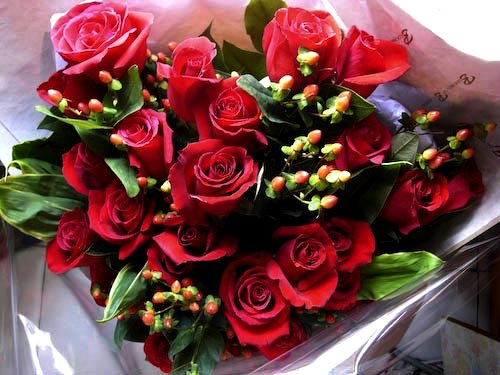

In [21]:
PIL.Image.open(str(roses[0]))

In [22]:
tulips = list(data_dir_2.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_potos/tulips/8710148289_6fc196a0f8_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/2402342888_dd65677013.jpg'),
 PosixPath('datasets/flower_potos/tulips/16862349256_0a1f91ab53.jpg'),
 PosixPath('datasets/flower_potos/tulips/17309951996_552d632cbb_n.jpg'),
 PosixPath('datasets/flower_potos/tulips/3396033831_bb88d93630.jpg')]

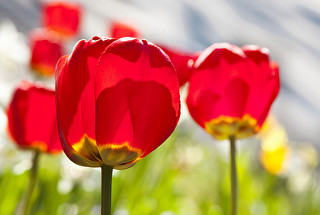

In [23]:
PIL.Image.open(str(tulips[0]))

## Create a Dictionary for All the Flower Category

In [24]:
flower_images_dict = {
    'roses': list(data_dir_2.glob('roses/*')),
    'daisy': list(data_dir_2.glob('daisy/*')),
    'dandelion': list(data_dir_2.glob('dandelion/*')),
    'sunflowers': list(data_dir_2.glob('sunflowers/*')),
    'tulips': list(data_dir_2.glob('tulips/*'))
}

In [25]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [26]:
flower_images_dict['roses'][0]

PosixPath('datasets/flower_potos/roses/2607130050_9c34310004.jpg')

In [29]:
str(flower_images_dict['roses'][0])

'datasets/flower_potos/roses/2607130050_9c34310004.jpg'

In [28]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [30]:
img

array([[[172, 142, 183],
        [170, 143, 183],
        [171, 145, 185],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[170, 143, 183],
        [171, 144, 184],
        [172, 145, 188],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[173, 145, 188],
        [173, 146, 189],
        [173, 149, 191],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[140, 131, 134],
        [142, 133, 136],
        [145, 136, 139],
        ...,
        [ 65,  62,  71],
        [ 69,  67,  73],
        [ 68,  66,  72]],

       [[139, 130, 133],
        [141, 132, 135],
        [144, 135, 138],
        ...,
        [ 66,  63,  72],
        [ 70,  68,  74],
        [ 70,  68,  74]],

       [[138, 129, 132],
        [140, 131, 134],
        [143, 134, 137],
        ...,
        [ 66,  64,  70],
        [ 71,  69,  75],
        [ 72,  70,  76]]

In [31]:
img.shape

(375, 500, 3)

In [32]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

### Resize the all the images

In [35]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
  print(flower_name)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [36]:
for flower_name, images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [37]:
y[:5]

[0, 0, 0, 0, 0]

In [38]:
X[0]

array([[[171, 143, 183],
        [168, 147, 189],
        [159, 149, 190],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[175, 150, 192],
        [172, 153, 196],
        [160, 149, 191],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[178, 157, 201],
        [169, 153, 197],
        [160, 148, 192],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[140, 131, 134],
        [145, 135, 138],
        [150, 136, 140],
        ...,
        [ 50,  46,  57],
        [ 56,  53,  61],
        [ 66,  64,  70]],

       [[142, 133, 136],
        [147, 137, 140],
        [151, 137, 141],
        ...,
        [ 55,  51,  62],
        [ 62,  59,  68],
        [ 67,  65,  71]],

       [[140, 131, 134],
        [146, 136, 139],
        [150, 136, 140],
        ...,
        [ 58,  54,  65],
        [ 59,  56,  65],
        [ 70,  68,  74]]

In [39]:
X = np.array(X)
y = np.array(y)

### Splitting the training and Test Sets

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
len(X_train), len(X_test)

(2752, 918)

In [43]:
# Scaliing the data set

X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [45]:
num_classes = 5

model = Sequential([
    # CNN Layers
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),

    # ANN Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [50]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [51]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 3s 21ms/step - loss: 2.2384 - accuracy: 0.3528
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 1.1414 - accuracy: 0.5363
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 1.0216 - accuracy: 0.6021
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.8616 - accuracy: 0.6726
Epoch 5/30
86/86 [==============================] - 2s 22ms/step - loss: 0.7245 - accuracy: 0.7336
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5642 - accuracy: 0.7907
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.3818 - accuracy: 0.8648
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2483 - accuracy: 0.9248
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1689 - accuracy: 0.9502
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1020 - accuracy: 0.9720
Epoch 11/

In [52]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 21ms/step - loss: 2.8454 - accuracy: 0.6460


[2.845393180847168, 0.6459695100784302]

This is a overfitting example

In [53]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[-22.112713  ,   2.45022   , -27.179686  ,  22.085608  ,
         14.689153  ],
       [ 16.22586   ,   6.0278263 ,   0.6969812 , -28.779022  ,
          5.557483  ],
       [ -8.085273  ,  -0.2599625 ,   0.05137124,  -1.5562199 ,
          1.813606  ],
       ...,
       [ -7.9464397 , -21.23848   ,  -7.5843425 ,  19.70555   ,
        -12.122947  ],
       [ 16.181524  , -11.50943   ,  -8.852523  , -18.390465  ,
         12.522269  ],
       [-15.4555855 , -28.118519  ,  12.101976  ,   8.711126  ,
         -3.2717175 ]], dtype=float32)

In [54]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.3774617e-20, 2.9661509e-09, 4.0187291e-22, 9.9938691e-01,
       6.1304757e-04], dtype=float32)>

In [55]:
np.argmax(score)

3

In [56]:
y_test[0]

1

## Address the Data Augmentation to reduce the Overfitting

In [60]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(
        'horizontal',
        input_shape=(180, 180, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

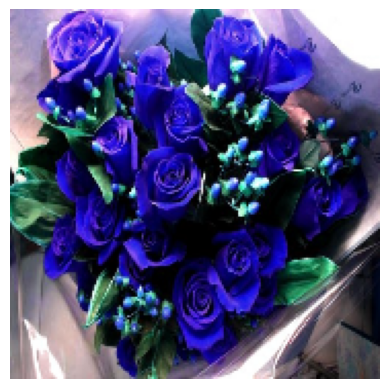

In [58]:
plt.axis('off')
plt.imshow(X[0])

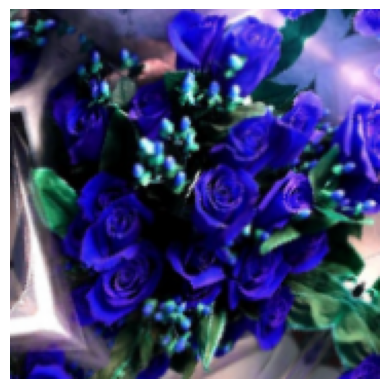

In [61]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [62]:
model2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [63]:
model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [66]:
model2.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 5s 29ms/step - loss: 1.3585 - accuracy: 0.4066
Epoch 2/30
86/86 [==============================] - 3s 30ms/step - loss: 1.0297 - accuracy: 0.5945
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9349 - accuracy: 0.6348
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8745 - accuracy: 0.6693
Epoch 5/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8033 - accuracy: 0.6890
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7651 - accuracy: 0.7078
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7259 - accuracy: 0.7220
Epoch 8/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6813 - accuracy: 0.7424
Epoch 9/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6495 - accuracy: 0.7507
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6449 - accuracy: 0.7511
Epoch 11/

In [67]:
model2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 12ms/step - loss: 0.8515 - accuracy: 0.7473


[0.8515421152114868, 0.7472766637802124]